# **Air Quality Prediction**

Air quality prediction involves using models to forecast the levels of various air pollutants (such as CO, NO₂, PM2.5, PM10, etc.) in the atmosphere. This prediction is essential for managing public health, urban planning, and environmental sustainability.

## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Importing Dataset**

In [4]:
df = pd.read_csv('/content/sample_data/AirQuality.csv', sep=';')

In [5]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


## **Describing the Dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [9]:
df.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


## **Data Preprocessing**

In [11]:
missing_values = df.isnull().sum()

In [12]:
missing_values

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


In [17]:
numeric_data = df.select_dtypes(include=['number'])

## **Data Visualization**

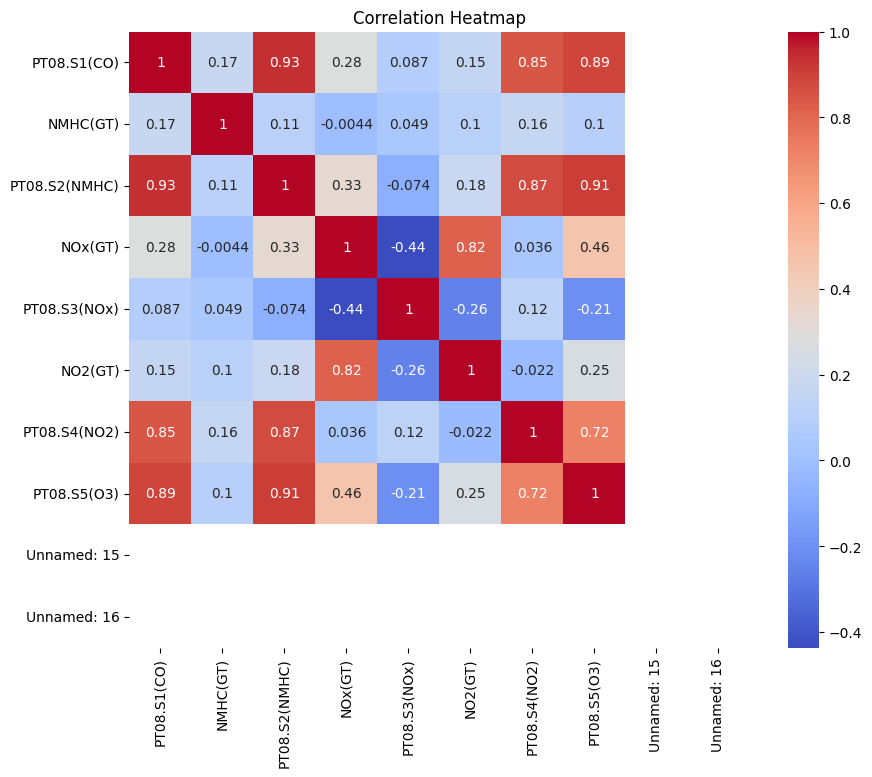

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

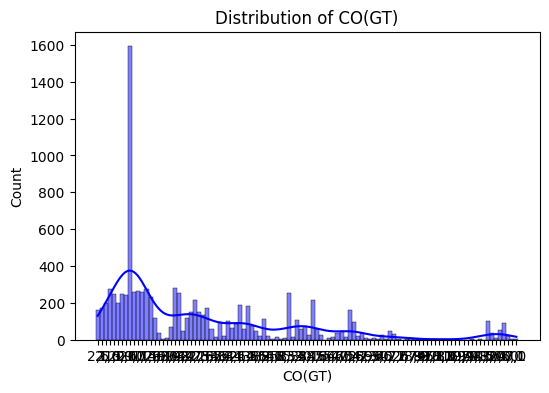

In [26]:
target_column = 'CO(GT)'
plt.figure(figsize=(6,4))
sns.histplot(df[target_column], kde=True, color='blue')
plt.title(f"Distribution of {target_column}")
plt.show()

## **Defining Input Features(X) and Target variables(y)**

In [35]:
X = df.drop(columns=['Date', 'Time', 'CO(GT)'], errors='ignore')  # Drop target ('CO(GT)') and non-numeric columns
y = df['CO(GT)'] # Target Variable

In [36]:
# Clean the dataset to ensure all columns in X are numeric
X = X.replace(',', '.', regex=True)  # Replace commas with dots (if any)
X = X.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric
y = pd.to_numeric(y, errors='coerce')

In [37]:
# Handle missing values (if any) caused by non-convertible strings
X = X.fillna(X.mean())
y = y.fillna(y.mean())

In [28]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Modeling**

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
model = RandomForestRegressor(random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## **Model Prediction**

In [40]:
y_pred = model.predict(X_test)

In [41]:
y_pred

array([-146.00341132, -119.35995788, -144.37610201, ..., -149.45456247,
       -148.42302293, -166.11843238])

## **Model Evaluation**

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
mean_squared_error(y_pred, y_test)

1252.0206035742137

In [44]:
r2_score(y_test, y_pred)

0.22311635681592412